
# EXPLORATORY DATA ANALYSIS
## DS Chapter 4

>**EDA allows the user to:**
> > - Use graphics to explore the relationship between the predictor variables and the target variable.
> > - Use graphics and tables to derive new variables that will increase predictive value.
> > - Use binning productively, to increase predictive value.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the dataset
os.chdir(r"C:\Users\ROONASHREE\Box Sync\DataScience\Python\datasets\bank-additional")
bank_train = pd.read_csv("bank-additional-full.csv",sep=';')

## 4.2 Bar Graphs with response overlay

> **Best Practices: Bar Graphs**
- When a bar graph with overlay is unclear regarding the response proportion, supplement it with a normalized bar graph.
- However, never provide a normalized bar graph without its non‐normalized version,

The first step in creating a bar graph is to create a contingency table of the
values in the predictor and target variables. We create the table using the crosstab()
command.

In [4]:
bank_train.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
crosstab_01 = pd.crosstab(bank_train['poutcome'],bank_train['y'])

In [7]:
crosstab_01

y,no,yes
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


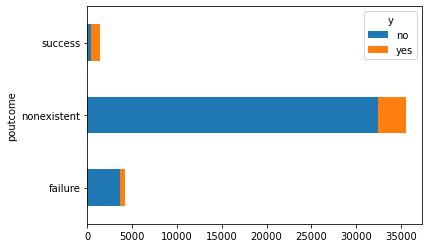

In [9]:
crosstab_01.plot(kind='barh', stacked = True)
plt.show()

In [13]:
# normalised bar graph

crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis=0)

In [12]:
crosstab_01.sum(1)

poutcome
failure         4252
nonexistent    35563
success         1373
dtype: int64

<AxesSubplot:ylabel='Outcome'>

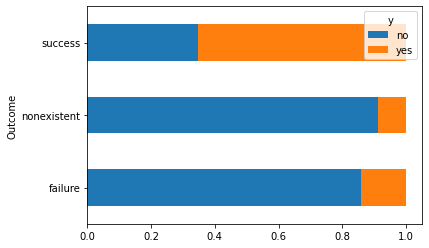

In [19]:
crosstab_norm.plot(xlabel='Outcome', ylabel = 'Previous Outcome', kind = 'barh',stacked = True)

## 4.3 Contigency Tables

> **Best Practices: Contingency Tables**
- Let the response variable represent the rows.
- Then, obtain the column percentages to directly compare the response proportions for each category of the predictor

In [27]:
crosstab_01 = pd.crosstab(bank_train['y'],bank_train['poutcome'])

In [28]:
crosstab_01

poutcome,failure,nonexistent,success
y,,,
no,3647,32422,479
yes,605,3141,894


In [35]:
round(crosstab_01.div(crosstab_01.sum(0),axis=1)*100,1)

poutcome,failure,nonexistent,success
y,,,
no,85.8,91.2,34.9
yes,14.2,8.8,65.1


## 4.4 Hisotgrams with response overlay

> **Best Practices: Histograms**
- Use a non‐normalized histogram to obtain the original distribution of the data values.
- If needed, use a normalized histogram to help better distinguish the response patterns.

Plot a histogram of the age variable with an overlay of
response.

In [47]:
age_y = bank_train[bank_train.y == 'yes']['age']
age_n = bank_train[bank_train.y == 'no']['age']

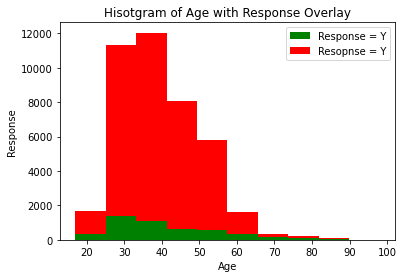

In [61]:
plt.hist([age_y,age_n], color=['green','red'],bins = 10,stacked = True)
plt.legend(['Response = Y','Resopnse = Y'])
plt.title('Hisotgram of Age with Response Overlay')
plt.xlabel("Age")
plt.ylabel("Response")
plt.show()

**Normalized histogram**
First, create a stacked histogram and save the information generated by the histogram

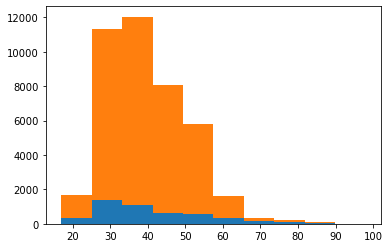

In [62]:
(n, bins, patches) = plt.hist([age_y,age_n],bins = 10, stacked = True)

Observer the values of n & bins 
 - n is the height of the histogram bars
 - bins are the boundaries of each bin in the histogram. 
 - Note that, since two variables are being plotted in the histogram, n has two series of numbers

In [70]:
n_table = np.column_stack([n[0],n[1]])

In [73]:
n_norm = n_table/n_table.sum(axis=1)[:,None]

In [76]:
ourbins = np.column_stack((bins[0:10], bins[1:11]))

In [77]:
ourbins

array([[17. , 25.1],
       [25.1, 33.2],
       [33.2, 41.3],
       [41.3, 49.4],
       [49.4, 57.5],
       [57.5, 65.6],
       [65.6, 73.7],
       [73.7, 81.8],
       [81.8, 89.9],
       [89.9, 98. ]])

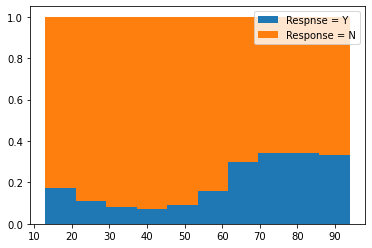

In [81]:
p1 = plt.bar(x=ourbins[:,0], height=n_norm[:,0],width=ourbins[:,1]-ourbins[:,0])
p2 = plt.bar(x=ourbins[:,0],height = n_norm[:,1],width=ourbins[:,1]-ourbins[:,0],
             bottom=n_norm[:,0])
plt.legend(['Respnse = Y','Response = N'])


## 4.5 BINNING BASED ON PREDICTIVE VALUE

> **Best Practice: Binning**
> 
*Many software packages provide “automatic” binning methods, such as equalcategory‐width binning or equal‐number‐of‐records‐per‐category binning. Though these may have their uses, if you are interested in enhancing the predictive power of your analysis, you should always try to use the binning based on predictive value that we have demonstrated here.*

Categorize the numerical values of age so that the categories had widely varying response proportions
- age binned
    1. Under 27
    2. 27 to 60
    3. 60 & up


In [82]:
#Bin the values using cut() from the pandas package
#The x = input specifies the variable that you want to divide into categories
#The bins = input specifies the edges of each bin. 
#The labels = input specifies the binlabel. 
#The right = False input specifies that we want our bins to exclude the righthandcutpoint.

bank_train['age_binned'] = pd.cut(x=bank_train['age'],
                                 bins = [0,27,60.1,100],
                                 labels=["Under 27","27 to 60","Over 60"],
                                 right = False)

In [83]:
crosstab_02 = pd.crosstab(bank_train['age_binned'], bank_train['y'])
crosstab_02

y,no,yes
age_binned,,
Under 27,1893,471
27 to 60,34159,3755
Over 60,496,414


<AxesSubplot:title={'center':'Bar Graph of Age(binned) with response overlay'}, xlabel='age_binned'>

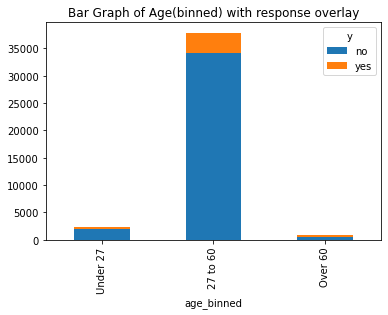

In [84]:
crosstab_02.plot(kind='bar',stacked=True,
                title='Bar Graph of Age(binned) with response overlay')

In [89]:
crosstab_n = crosstab_02.div(crosstab_02.sum(1),axis=0)
crosstab_n

y,no,yes
age_binned,,
Under 27,0.800761,0.199239
27 to 60,0.900960,0.099040
Over 60,0.545055,0.454945


<AxesSubplot:xlabel='age_binned'>

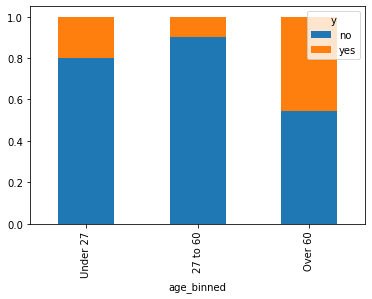

In [90]:
crosstab_n.plot(kind='bar',stacked=True)